In [1]:
pip install pandas matplotlib scikit-learn seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

ds = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

X = ds.drop(columns=["Diabetes_012"])
y = ds['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")

Accuracy: 83.23379848628193 %


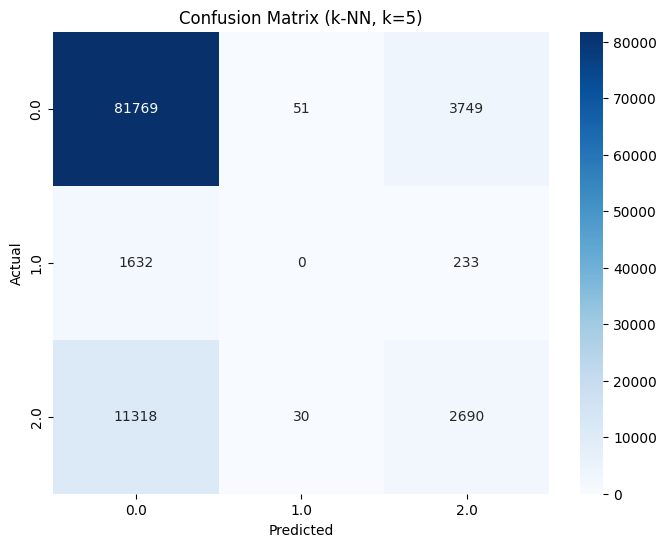

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title(f'Confusion Matrix (k-NN, k={k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()